# Sale Analysis By [Rohit Kag]

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

In [4]:
df1 = pd.read_excel("ECOMM DATA.xlsx",sheet_name="Orders")

In [5]:
dfp = pd.read_excel("ECOMM DATA.xlsx",sheet_name="People")

In [6]:
dfo = pd.read_excel("ECOMM DATA.xlsx",sheet_name="Returns")

In [7]:
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [8]:
df1.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [9]:
df1.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [10]:
df1.drop('Postal Code',axis=1,inplace=True)

In [11]:
df1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [12]:
df1.rename(columns={'Row ID':'Row_ID', 'Order ID':'Order_ID', 'Order Date':'Order_Date', 'Ship Date':'Ship_Date', 'Ship Mode':'Ship_Mode',
       'Customer ID':'Customer_ID', 'Customer Name':'Customer_Name','Product ID':'Product_ID','Product Name':'Product_Name','Shipping Cost':'Shipping_Cost', 'Order Priority':'Order_Priority'}, inplace= True)

In [13]:
df1.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [14]:
df1.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost', 'Order_Priority'],
      dtype='object')

In [15]:
date_time = ['Order_Date', 'Ship_Date']

In [16]:
df1.Order_Date = pd.to_datetime(df1.Order_Date)
df1.Ship_Date = pd.to_datetime(df1.Ship_Date)

In [17]:
df1.Row_ID = df1.Row_ID.astype('int')
df1.Order_ID = df1.Order_ID.astype('string')

In [18]:
df1.select_dtypes(include='object').columns

Index(['Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Order_Priority'],
      dtype='object')

In [19]:
df1.Ship_Mode= df1.Ship_Mode.astype('string')
df1.Customer_ID= df1.Customer_ID.astype('string')
df1.Customer_Name= df1.Customer_Name.astype('string')
df1.Segment= df1.Segment.astype('string')
df1.City= df1.City.astype('string')
df1.Country= df1.Country.astype('string')
df1.State= df1.State.astype('string')
df1.Product_ID = df1.Product_ID.astype('string')
df1.Category = df1.Category.astype('string')

In [20]:
df1['Sub-Category'] = df1['Sub-Category'].astype('string')
df1.Product_Name = df1.Product_Name.astype('string')
df1.Quantity = df1.Quantity.astype('string')
df1.Discount = df1.Discount.astype('string')
df1.Profit = df1.Profit.astype('string')
df1.Shipping_Cost = df1.Shipping_Cost.astype('string')
df1.Order_Priority = df1.Order_Priority.astype('string')

In [21]:
df1.Market = df1.Market.astype('string')
df1.Sales = df1.Sales.astype('string')

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          51290 non-null  int32         
 1   Order_ID        51290 non-null  string        
 2   Order_Date      51290 non-null  datetime64[ns]
 3   Ship_Date       51290 non-null  datetime64[ns]
 4   Ship_Mode       51290 non-null  string        
 5   Customer_ID     51290 non-null  string        
 6   Customer_Name   51290 non-null  string        
 7   Segment         51290 non-null  string        
 8   City            51290 non-null  string        
 9   State           51290 non-null  string        
 10  Country         51290 non-null  string        
 11  Market          51290 non-null  string        
 12  Region          51290 non-null  object        
 13  Product_ID      51290 non-null  string        
 14  Category        51290 non-null  string        
 15  Su

In [23]:
df1['Order_Day'] = df1.Order_Date.dt.day_name()
df1['Ship_Day'] = df1.Ship_Date.dt.day_name()

In [24]:
df1['Order_Month'] = df1.Order_Date.dt.month_name()
df1['Ship_Month'] = df1.Ship_Date.dt.month_name()

In [25]:
df1.Ship_Mode.unique()

<StringArray>
['Same Day', 'Second Class', 'First Class', 'Standard Class']
Length: 4, dtype: string

In [26]:
df1.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_Day,Ship_Day,Order_Month,Ship_Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,2309.65,7,0.0,762.1844999999998,933.57,Critical,Tuesday,Tuesday,July,July
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.395,9,0.1,-288.765,923.63,Critical,Tuesday,Thursday,February,February


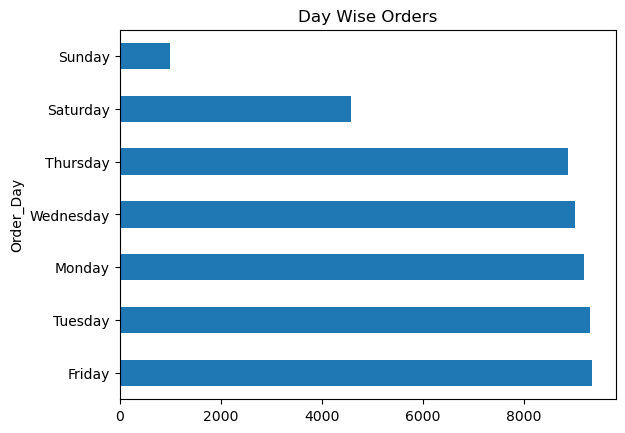

In [27]:
df1.Order_Day.value_counts().plot(kind='barh')
plt.title('Day Wise Orders')
plt.show()

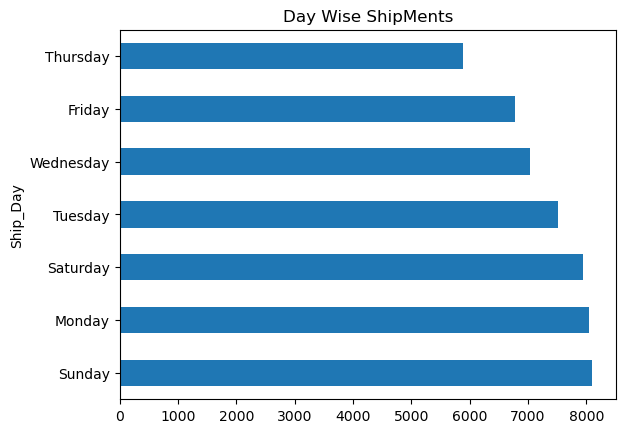

In [28]:
df1.Ship_Day.value_counts().plot(kind='barh')
plt.title('Day Wise ShipMents')
plt.show()

<Axes: >

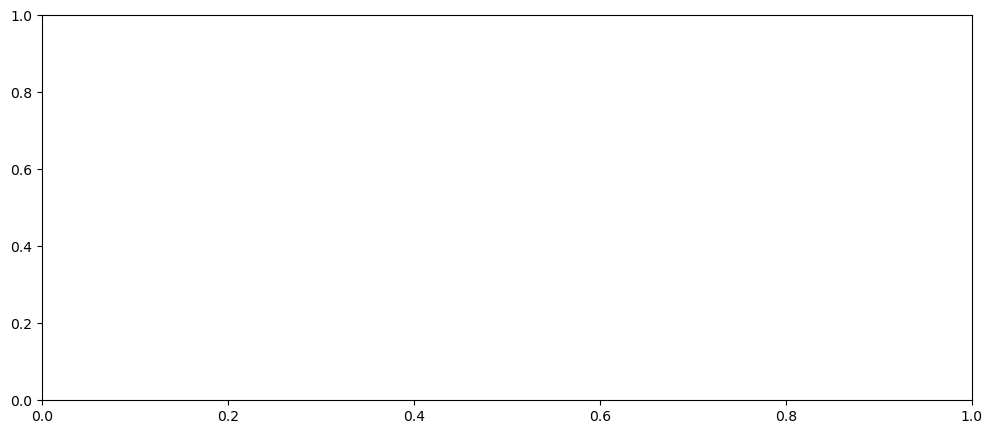

In [29]:
plt.figure(figsize=(12,5))
sns.lineplot()

In [30]:
a = {'January': 3122, 'February': 2927, 'March': 3728, 'April': 3499, 'May': 3938, 'June': 4892, 'July': 3571, 'August': 4715, 'September': 5237, 'October': 4467, 'November': 5660, 'December': 5660}

In [31]:
import pandas as pd

# Your dictionary
a = {'January': 3122, 'February': 2927, 'March': 3728, 'April': 3499, 'May': 3938, 'June': 4892, 'July': 3571, 'August': 4715, 'September': 5237, 'October': 4467, 'November': 5660, 'December': 5660}

# Create DataFrame
df = pd.DataFrame(list(a.items()), columns=['Month', 'Value'])

# Display DataFrame
print(df)

        Month  Value
0     January   3122
1    February   2927
2       March   3728
3       April   3499
4         May   3938
5        June   4892
6        July   3571
7      August   4715
8   September   5237
9     October   4467
10   November   5660
11   December   5660


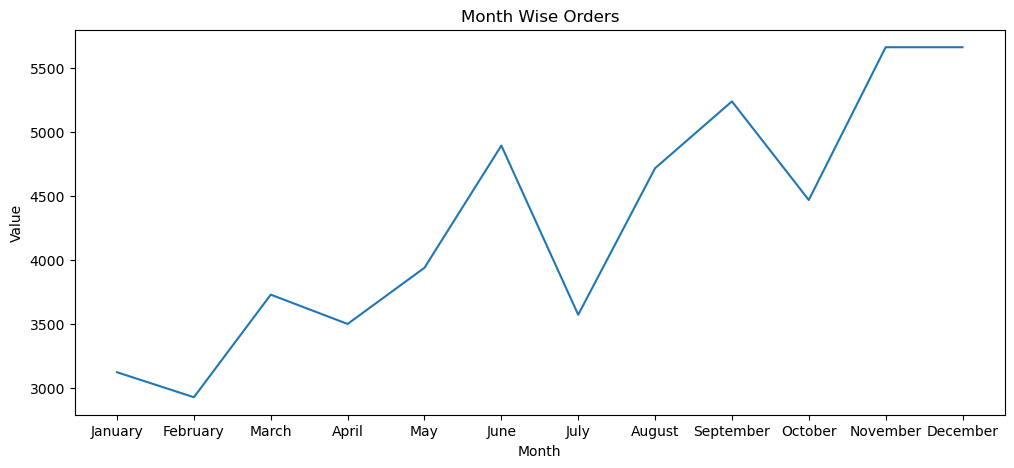

In [32]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df,x='Month',y='Value')
plt.title('Month Wise Orders')
plt.show()

In [33]:
df1.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_Day,Ship_Day,Order_Month,Ship_Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,2309.65,7,0.0,762.1844999999998,933.57,Critical,Tuesday,Tuesday,July,July
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.395,9,0.1,-288.765,923.63,Critical,Tuesday,Thursday,February,February
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,5175.171000000001,9,0.1,919.9709999999997,915.49,Medium,Thursday,Friday,October,October
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,2892.51,5,0.1,-96.54000000000005,910.16,Medium,Monday,Wednesday,January,January
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,2832.96,8,0.0,311.52,903.04,Critical,Tuesday,Wednesday,November,November


In [34]:
a = df1['Ship_Month'].value_counts().reset_index()

In [35]:
months_order = ['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ship_month_counts = a.set_index('Ship_Month').reindex(months_order)

<Figure size 2000x2000 with 0 Axes>

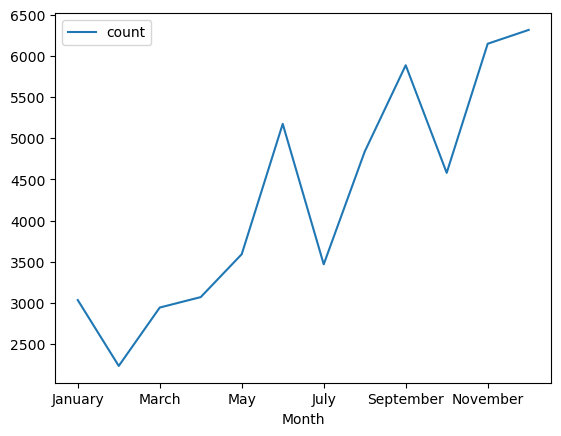

In [36]:
plt.figure(figsize=(20,20))
ship_month_counts.plot(kind='line')
plt.xlabel('Month')
plt.show()

In [37]:
df1.head(4)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_Day,Ship_Day,Order_Month,Ship_Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,2309.65,7,0.0,762.1844999999998,933.57,Critical,Tuesday,Tuesday,July,July
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.395,9,0.1,-288.765,923.63,Critical,Tuesday,Thursday,February,February
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,5175.171000000001,9,0.1,919.9709999999997,915.49,Medium,Thursday,Friday,October,October
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,2892.51,5,0.1,-96.54000000000005,910.16,Medium,Monday,Wednesday,January,January


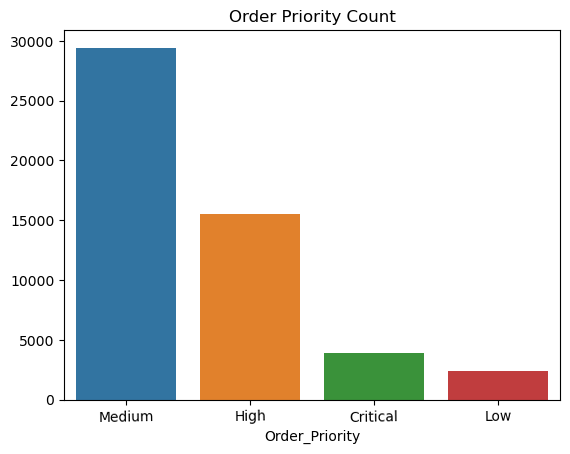

In [38]:
priority= df1.Order_Priority.value_counts()
sns.barplot(x=priority.index,y=priority.values)
plt.title('Order Priority Count')
plt.xticks(rotation=1)
plt.show()

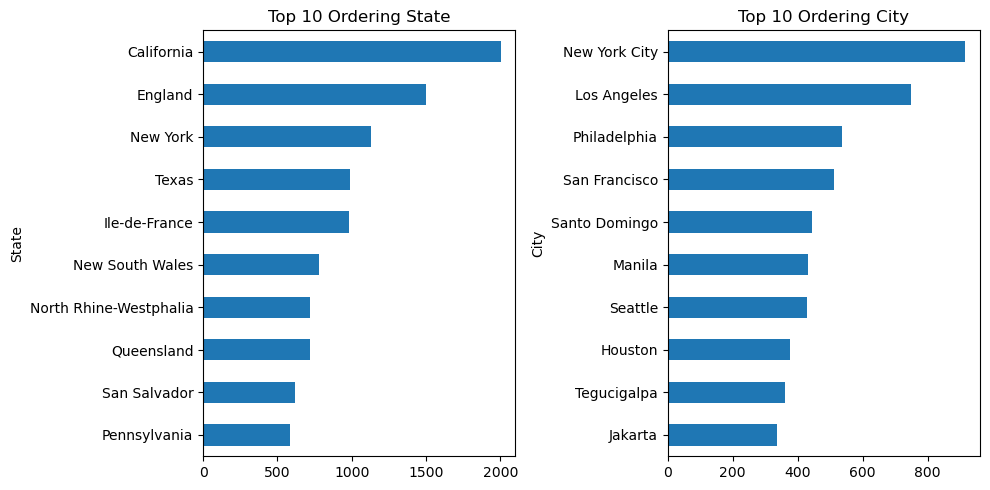

In [39]:
a = ['State', 'City']
rep = 1
nrows = 1
ncols = 2

plt.figure(figsize=(10, 5))
for i in a:
    plt.subplot(nrows, ncols, rep)
    df1[i].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
    plt.title('Top 10 Ordering {}'.format(i))
    rep += 1

plt.tight_layout()
plt.show()

In [40]:
df1.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_Day,Ship_Day,Order_Month,Ship_Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,2309.65,7,0.0,762.1844999999998,933.57,Critical,Tuesday,Tuesday,July,July
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.395,9,0.1,-288.765,923.63,Critical,Tuesday,Thursday,February,February


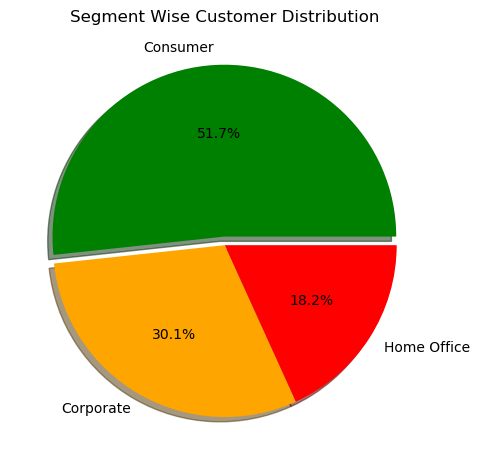

In [41]:
plt.pie(data=df1,x=df1.Segment.value_counts(),
        labels=df1.Segment.unique(),explode=[0.05,0,0],labeldistance=1.1,autopct='%1.1f%%',shadow=True,
        colors=['Green','Orange','Red'])
plt.title('Segment Wise Customer Distribution')
plt.tight_layout()
plt.show()

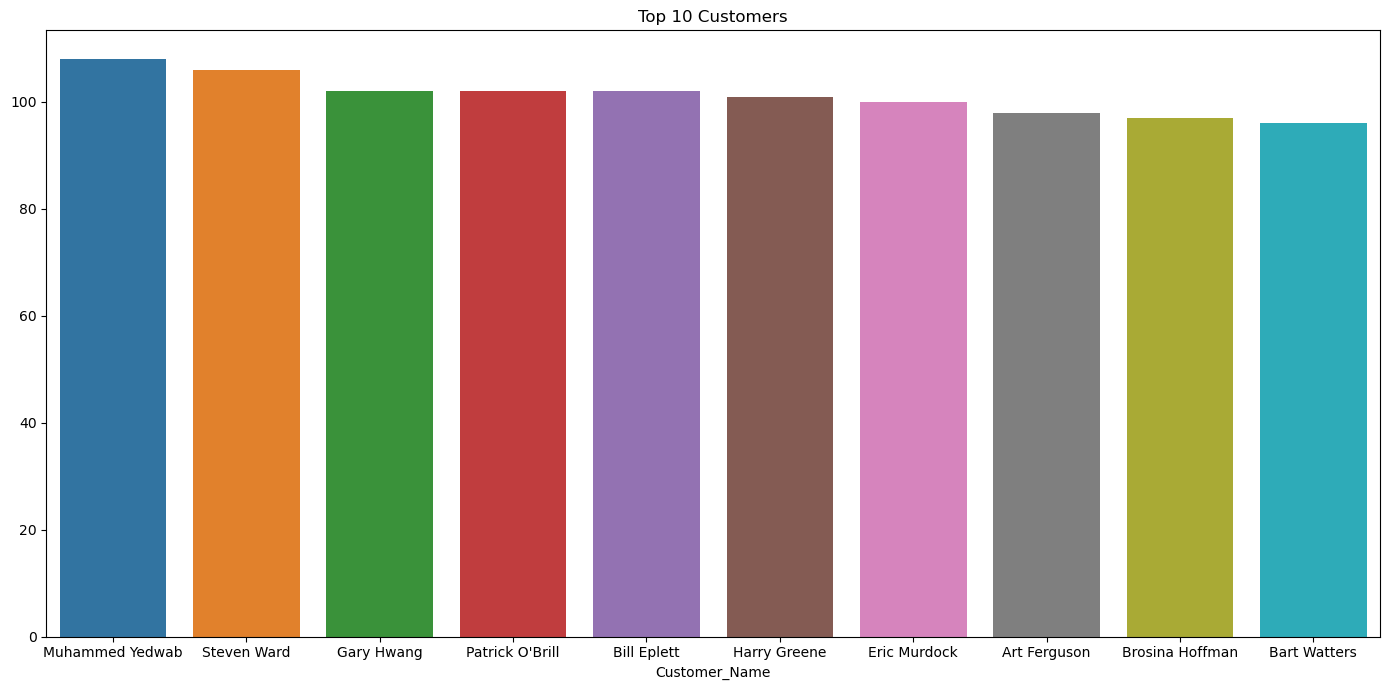

In [42]:
plt.figure(figsize=(14,7))
sns.barplot(data=df1,x=df1.Customer_Name.value_counts().head(10).index,y=df1.Customer_Name.value_counts().head(10).values)
plt.title('Top 10 Customers')
plt.tight_layout()
plt.show()

In [43]:
df1.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_Day,Ship_Day,Order_Month,Ship_Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,2309.65,7,0.0,762.1844999999998,933.57,Critical,Tuesday,Tuesday,July,July
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.395,9,0.1,-288.765,923.63,Critical,Tuesday,Thursday,February,February


In [44]:
df1['Sales'] = df1['Sales'].astype(float)

In [45]:
numcols = ['Sales','Quantity','Discount','Profit','Shipping_Cost']

for i in numcols:
    df1[i] = df1[i].astype(float)

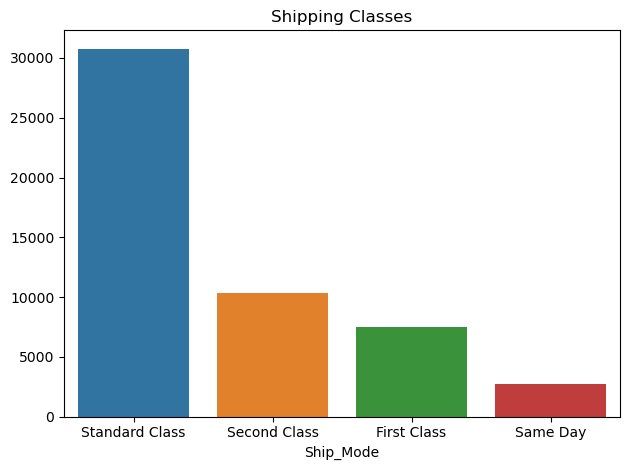

In [46]:
a = df1['Ship_Mode'].value_counts()
sns.barplot(x=a.index,y=a.values)
plt.title('Shipping Classes')
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_9532\2692461090.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.loc[:,i])
C:\Users\dell\AppData\Local\Temp\ipykernel_9532\2692461090.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.loc[:,i])
C:\Users\dell\AppData\Local\Temp\ipykernel_953

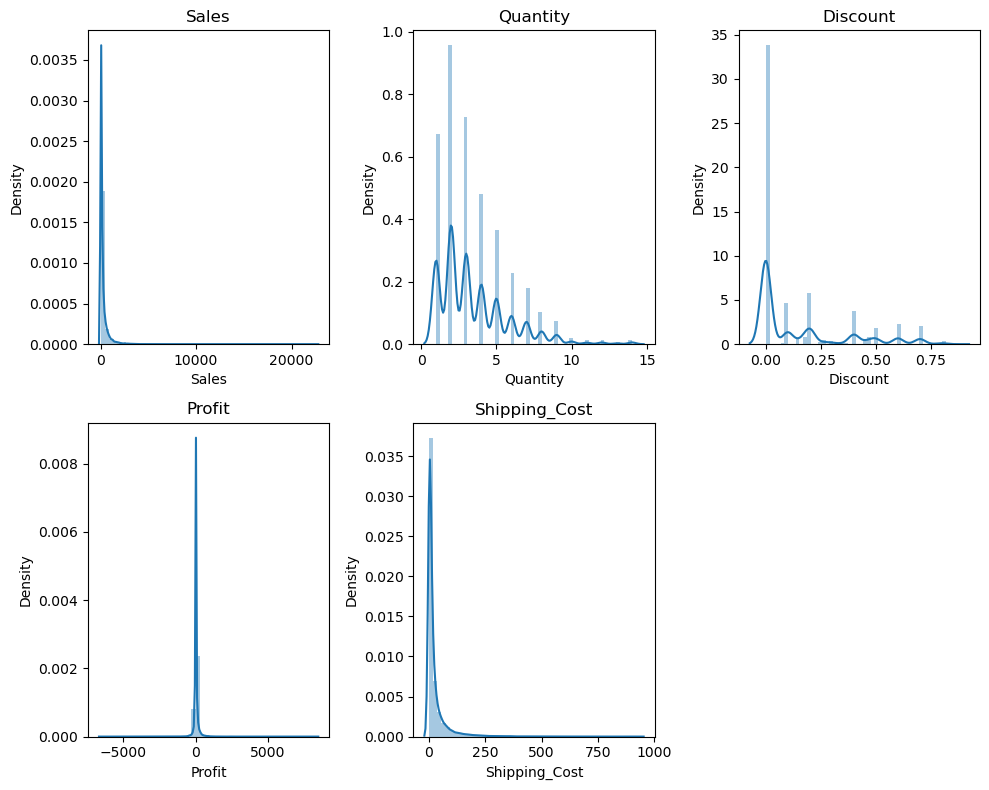

In [47]:
rep=1
ncols=3
nrows=2

plt.figure(figsize=(10,8))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.distplot(df1.loc[:,i])
    plt.title(i)
    rep+=1
    
plt.tight_layout()
plt.show()

In [48]:
dfo

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU
...,...,...,...
1168,Yes,ES-2013-2639112,EU
1169,Yes,CA-2014-134194,United States
1170,Yes,ES-2012-3246286,EU
1171,Yes,ES-2012-4379168,EU


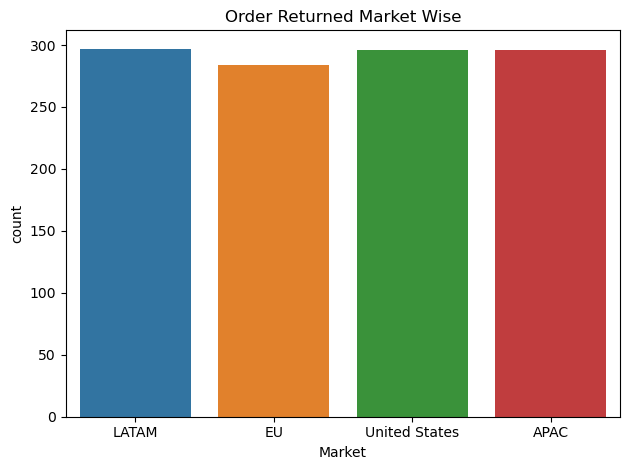

In [49]:
sns.countplot(data=dfo,x=dfo.Market)
plt.title('Order Returned Market Wise')
plt.tight_layout()
plt.show()